In [107]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns

In [108]:
df = pd.read_csv("C:/travail/esilv/Dorset/IA/IRIS_ Flower_Dataset.csv")

In [109]:
df.info()
df.isnull().sum()
df.species.unique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [110]:
df.head()

sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa

In [111]:
print("Dataset shape: ", df.shape)
print("Dataset size: ", df.size)

Dataset shape:  (150, 5)
Dataset size:  750


In [112]:
print("Data types: \n", df.dtypes)

Data types: 
 sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object


In [113]:
print("Number of missing values per column: \n", df.isnull().sum())

Number of missing values per column: 
 sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64


In [114]:
print("Number of duplicated rows: ", df.duplicated().sum())

Number of duplicated rows:  3


In [115]:
df = df.drop_duplicates()

In [116]:
means_by_species = df.groupby('species').mean()

print(means_by_species)

                 sepal_length  sepal_width  petal_length  petal_width
species                                                              
Iris-setosa          5.010417     3.431250      1.462500     0.250000
Iris-versicolor      5.936000     2.770000      4.260000     1.326000
Iris-virginica       6.604082     2.979592      5.561224     2.028571


In [117]:
df.describe()

sepal_length  sepal_width  petal_length  petal_width
count    147.000000   147.000000    147.000000   147.000000
mean       5.856463     3.055782      3.780272     1.208844
std        0.829100     0.437009      1.759111     0.757874
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.400000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000

array([[<Axes: title={'center': 'sepal_length'}>,
        <Axes: title={'center': 'sepal_width'}>],
       [<Axes: title={'center': 'petal_length'}>,
        <Axes: title={'center': 'petal_width'}>]], dtype=object)

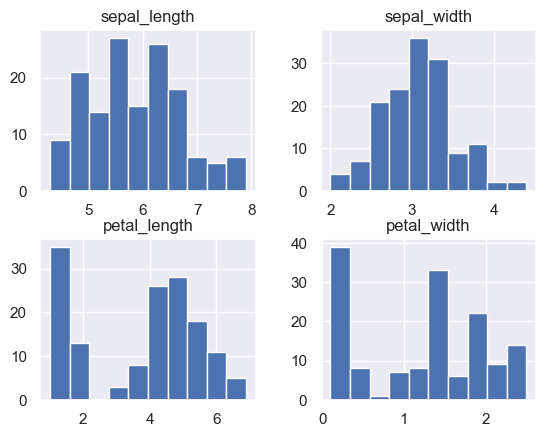

In [118]:
df.hist()

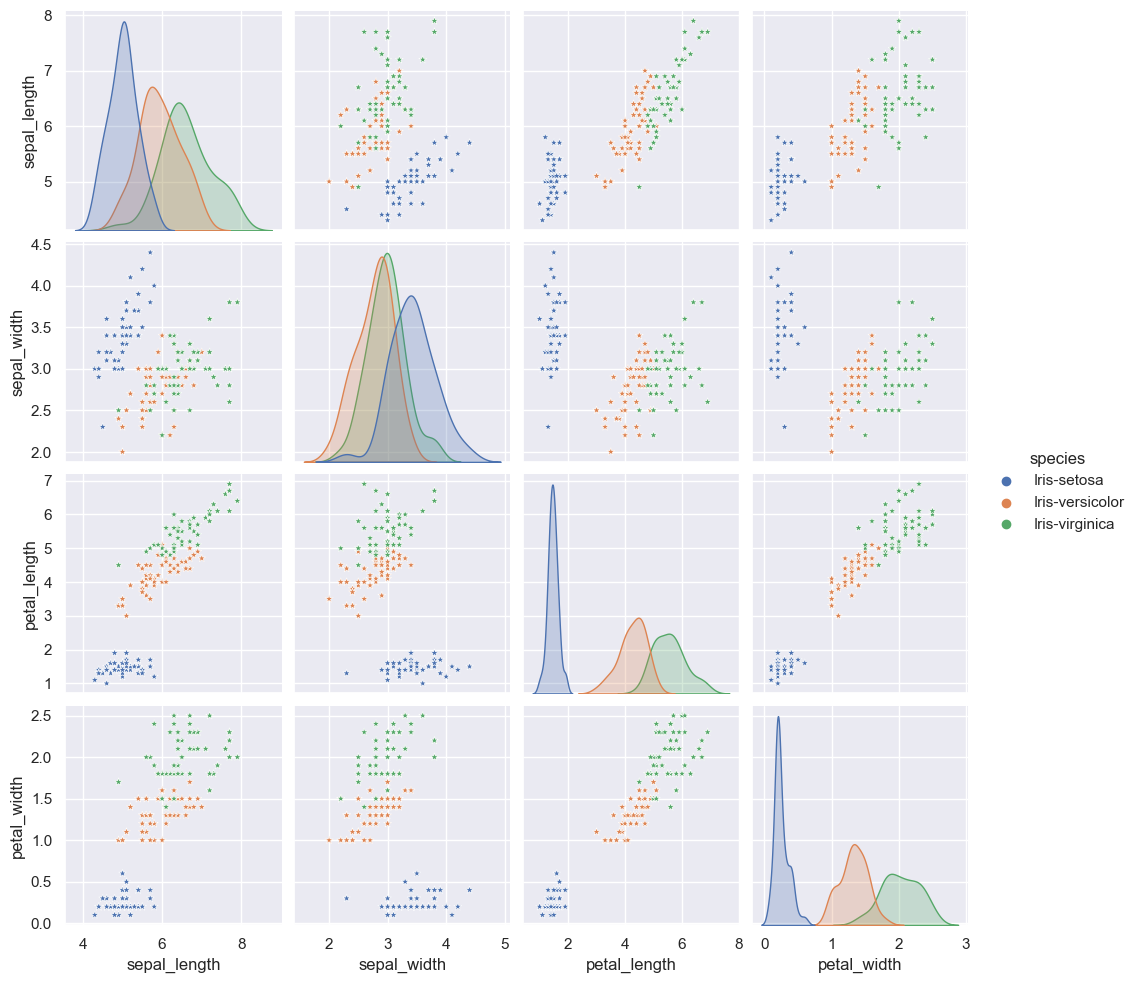

In [119]:
g = sns.pairplot(df, hue='species', markers='*')
plt.show()

In [120]:
df_num = df[["sepal_length","sepal_width","petal_length","petal_width"]] 

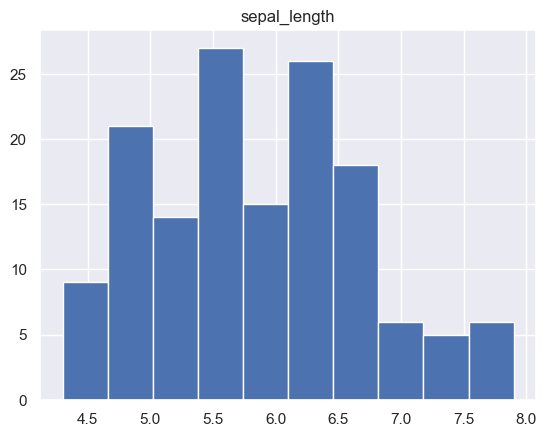

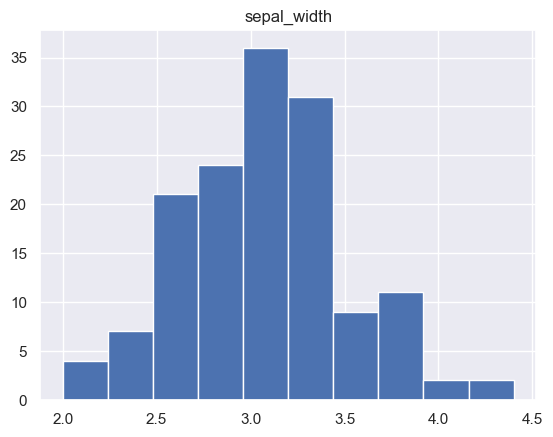

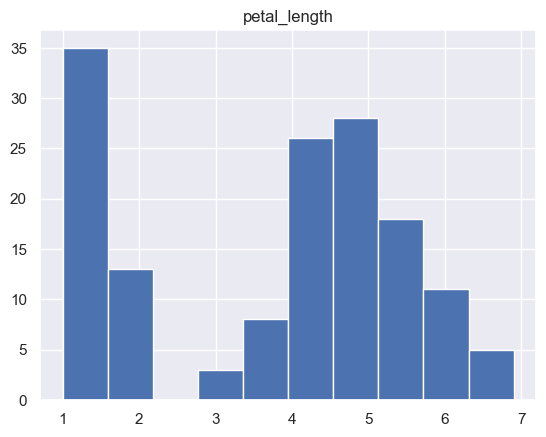

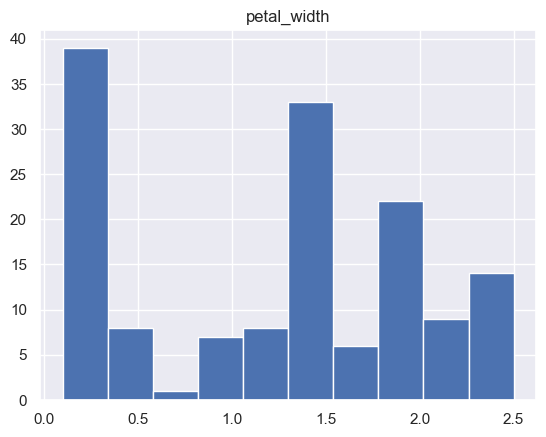

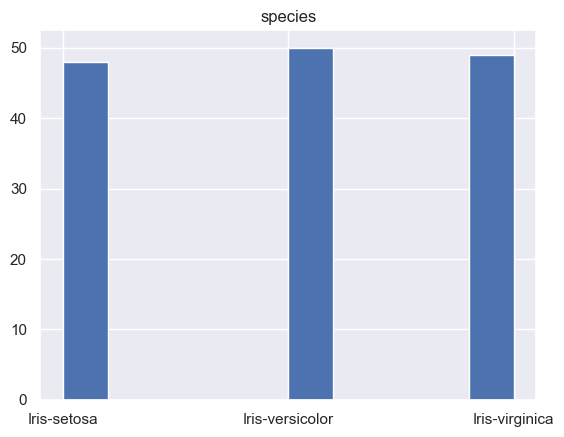

In [121]:
for i in df.columns:
    plt.hist(df[i])
    plt.title(i)
    plt.show()

C:\Users\basti\AppData\Local\Temp\ipykernel_8448\2491113724.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


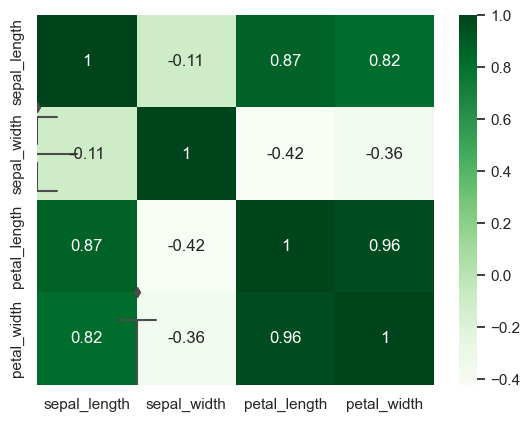

In [122]:
sns.boxplot(x = "species", y = "petal_length", data = df);
sns.boxplot(x = "species", y = "sepal_length", data = df);
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='Greens')
plt.show()

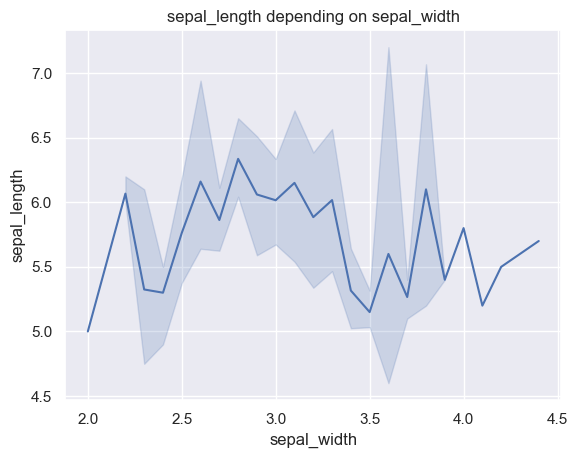

In [135]:
sns.lineplot(x="sepal_width", y="sepal_length", data=df)
plt.title("sepal_length depending on sepal_width")
plt.show()

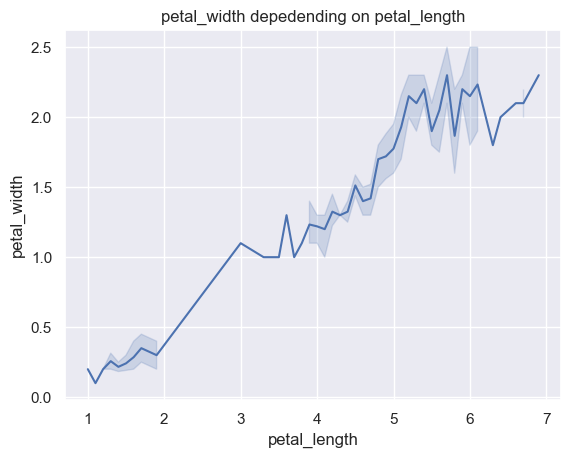

In [136]:
sns.lineplot(x="petal_length", y="petal_width", data=df)
plt.title("petal_width depedending on petal_length")
plt.show()

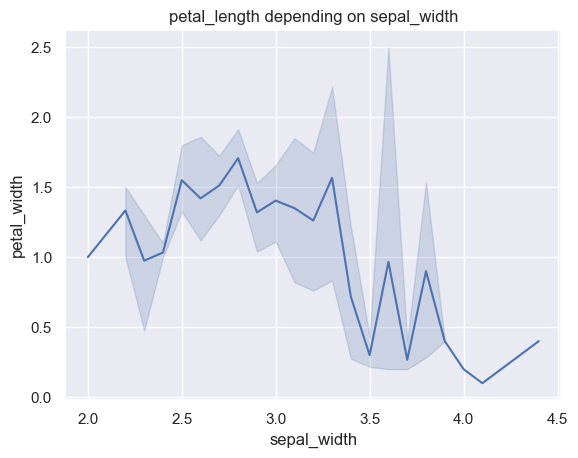

In [137]:
sns.lineplot(x="sepal_width", y="petal_width", data=df)
plt.title("petal_length depending on sepal_width")
plt.show()

In [126]:
df1 = df['species'].map({'Iris-setosa' : 0,
                'Iris-versicolor' : 1,
                'Iris-virginica' : 2})

In [127]:
df = df.drop(columns=["species"])

In [128]:
data = pd.concat([df, df1], axis = 1)
data.head()

sepal_length  sepal_width  petal_length  petal_width  species
0           5.1          3.5           1.4          0.2        0
1           4.9          3.0           1.4          0.2        0
2           4.7          3.2           1.3          0.2        0
3           4.6          3.1           1.5          0.2        0
4           5.0          3.6           1.4          0.2        0

In [129]:
from sklearn.model_selection import train_test_split
X=data[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']] 
y=data['species']


In [130]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [131]:
from sklearn.ensemble import RandomForestClassifier

clf=RandomForestClassifier(n_estimators=500)

clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

In [132]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
conf_mat = confusion_matrix(y_test,y_pred)
print(conf_mat)

Accuracy: 0.9666666666666667
[[10  0  0]
 [ 0  7  1]
 [ 0  0 12]]


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.88      0.93         8
           2       0.92      1.00      0.96        12

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.96        30
weighted avg       0.97      0.97      0.97        30



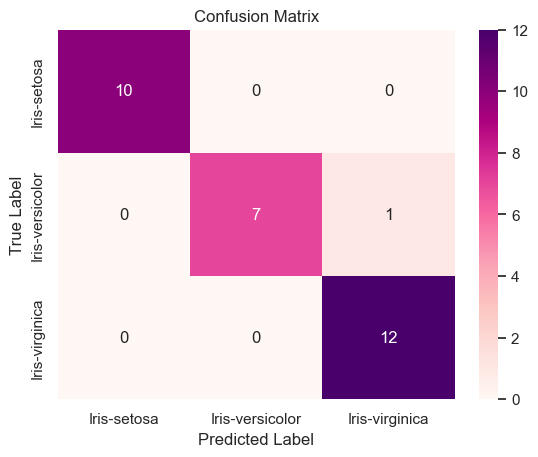

In [133]:
rep = classification_report(y_test, y_pred)
print(rep)

sns.set()
sns.heatmap(conf_mat, annot=True, fmt="d", cmap="RdPu", xticklabels=["Iris-setosa", "Iris-versicolor", "Iris-virginica"], yticklabels=["Iris-setosa", "Iris-versicolor", "Iris-virginica"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [134]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {'n_estimators': [100, 200, 500],
              'max_depth': [None, 5, 10],
              'max_features': ['auto', 'sqrt', 'log2'],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4]}

model = RandomForestClassifier(random_state=42)
grid = GridSearchCV(model, param_grid, cv=5, n_jobs=-1, scoring='accuracy')
grid.fit(X_train, y_train)

best_model = grid.best_estimator_
accuracy = best_model.score(X_test, y_test)

print(f"Best hyperparameters : {grid.best_params_}")
print(f"Accuracy : {accuracy}")


C:\travail\Esilv\Dorset\Python\Nouveau dossier\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Best hyperparameters : {'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
Accuracy : 0.9666666666666667
